In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def generate_numbers(k):
    random_numbers = np.random.uniform(0, 1, 10**k).astype(np.float32)
    return random_numbers

results_a = []
for k in range(4, 8):
    def sum_with_double_precision(numbers):
        sum_double = np.float64(0.0)
        for num in numbers:
            sum_double += num
        return sum_double

    random_numbers = generate_numbers(k)
    print(f"Test dla {len(random_numbers)} liczb")
    result_a = sum_with_double_precision(random_numbers)
    print(f"(a) Suma z akumulatorem podwójnej precyzji: {result_a}")

    numpy_sum = np.sum(random_numbers)
    print(f"Suma według NumPy: {numpy_sum}")
    print(f"Różnica między metodami: {abs(result_a - numpy_sum)}")
    results_a.append(abs(result_a - numpy_sum) / numpy_sum)

Test dla 10000 liczb
(a) Suma z akumulatorem podwójnej precyzji: 5045.345611928788
Suma według NumPy: 5045.345703125
Różnica między metodami: 9.119621245190501e-05
Test dla 100000 liczb
(a) Suma z akumulatorem podwójnej precyzji: 49990.58131087306
Suma według NumPy: 49990.58203125
Różnica między metodami: 0.0007203769418993033
Test dla 1000000 liczb
(a) Suma z akumulatorem podwójnej precyzji: 500219.7298761829
Suma według NumPy: 500219.84375
Różnica między metodami: 0.1138738170848228
Test dla 10000000 liczb
(a) Suma z akumulatorem podwójnej precyzji: 5000175.4710165635
Suma według NumPy: 5000172.5
Różnica między metodami: 2.971016563475132


In [23]:
results_b = []
for k in range(4, 8):
    def sum_with_single_precision(numbers):
        sum_double = np.float32(0.0)
        for num in numbers:
            sum_double += num
        return sum_double

    random_numbers = generate_numbers(k)
    print(f"Test dla {len(random_numbers)} liczb")
    result_b = sum_with_single_precision(random_numbers)
    print(f"(b) Suma z akumulatorem pojedynczej precyzji: {result_b}")

    numpy_sum = np.sum(random_numbers)
    print(f"Suma według NumPy: {numpy_sum}")
    print(f"Różnica między metodami: {abs(result_b - numpy_sum)}")
    results_b.append(abs(result_b - numpy_sum) / numpy_sum)

Test dla 10000 liczb
(b) Suma z akumulatorem pojedynczej precyzji: 5002.3359375
Suma według NumPy: 5002.34326171875
Różnica między metodami: 0.00732421875
Test dla 100000 liczb
(b) Suma z akumulatorem pojedynczej precyzji: 50008.65625
Suma według NumPy: 50008.30078125
Różnica między metodami: 0.35546875
Test dla 1000000 liczb
(b) Suma z akumulatorem pojedynczej precyzji: 500121.09375
Suma według NumPy: 500117.59375
Różnica między metodami: 3.5
Test dla 10000000 liczb
(b) Suma z akumulatorem pojedynczej precyzji: 5000945.0
Suma według NumPy: 5000606.0
Różnica między metodami: 339.0


In [24]:
results_c = []
for k in range(4, 8):
    random_numbers = generate_numbers(k)
    n = len(random_numbers)
    acc = np.float32(0.0)
    err = np.float32(0.0)
    for i in range(n):
        y = random_numbers[i] - err
        temp = acc + y
        err = (temp - acc) - y
        acc = temp
    
    print(f"Test dla {len(random_numbers)} liczb")
    print(f"(c) Suma z akumulatorem pojedynczej precyzji z korekcją błędu: {acc}")
    print(f"Różnica między metodami: {abs(acc - numpy_sum)}")
    results_c.append(abs(acc - numpy_sum) / numpy_sum)

Test dla 10000 liczb
(c) Suma z akumulatorem pojedynczej precyzji z korekcją błędu: 4970.62060546875
Różnica między metodami: 4995635.5
Test dla 100000 liczb
(c) Suma z akumulatorem pojedynczej precyzji z korekcją błędu: 49920.01953125
Różnica między metodami: 4950686.0
Test dla 1000000 liczb
(c) Suma z akumulatorem pojedynczej precyzji z korekcją błędu: 500107.9375
Różnica między metodami: 4500498.0
Test dla 10000000 liczb
(c) Suma z akumulatorem pojedynczej precyzji z korekcją błędu: 4998727.0
Różnica między metodami: 1879.0


In [25]:
results_d = []
for k in range(4, 8):
    def sum_sorted(numbers):
        sum_double = np.float32(0.0)
        for num in sorted(numbers):
            sum_double += num
        return sum_double

    random_numbers = generate_numbers(k)
    print(f"Test dla {len(random_numbers)} liczb")
    result_d = sum_sorted(random_numbers)
    print(f"(d) Suma z akumulatorem pojedynczej precyzji: {result_d}")

    numpy_sum = np.sum(random_numbers)
    print(f"Suma według NumPy: {numpy_sum}")
    print(f"Różnica między metodami: {abs(result_d - numpy_sum)}")
    results_d.append(abs(result_d - numpy_sum) / numpy_sum)

Test dla 10000 liczb
(d) Suma z akumulatorem pojedynczej precyzji: 5039.0048828125
Suma według NumPy: 5038.998046875
Różnica między metodami: 0.0068359375
Test dla 100000 liczb
(d) Suma z akumulatorem pojedynczej precyzji: 50101.09375
Suma według NumPy: 50101.40234375
Różnica między metodami: 0.30859375
Test dla 1000000 liczb
(d) Suma z akumulatorem pojedynczej precyzji: 500236.59375
Suma według NumPy: 500239.84375
Różnica między metodami: 3.25
Test dla 10000000 liczb
(d) Suma z akumulatorem pojedynczej precyzji: 5057327.5
Suma według NumPy: 4999647.5
Różnica między metodami: 57680.0


In [26]:
results_e = []
for k in range(4, 8):
    def sum_sorted(numbers):
        sum_double = np.float32(0.0)
        for num in sorted(numbers)[::-1]:
            sum_double += num
        return sum_double

    random_numbers = generate_numbers(k)
    print(f"Test dla {len(random_numbers)} liczb")
    result_e = sum_sorted(random_numbers)
    print(f"(e) Suma z akumulatorem pojedynczej precyzji: {result_e}")

    numpy_sum = np.sum(random_numbers)
    print(f"Suma według NumPy: {numpy_sum}")
    print(f"Różnica między metodami: {abs(result_d - numpy_sum)}")
    results_e.append(abs(result_e - numpy_sum) / numpy_sum)

Test dla 10000 liczb
(e) Suma z akumulatorem pojedynczej precyzji: 4983.52685546875
Suma według NumPy: 4983.52880859375
Różnica między metodami: 5052344.0
Test dla 100000 liczb
(e) Suma z akumulatorem pojedynczej precyzji: 50101.21875
Suma według NumPy: 50101.16015625
Różnica między metodami: 5007226.5
Test dla 1000000 liczb
(e) Suma z akumulatorem pojedynczej precyzji: 499792.5625
Suma według NumPy: 499807.5625
Różnica między metodami: 4557520.0
Test dla 10000000 liczb
(e) Suma z akumulatorem pojedynczej precyzji: 5001672.0
Suma według NumPy: 5001051.5
Różnica między metodami: 56276.0


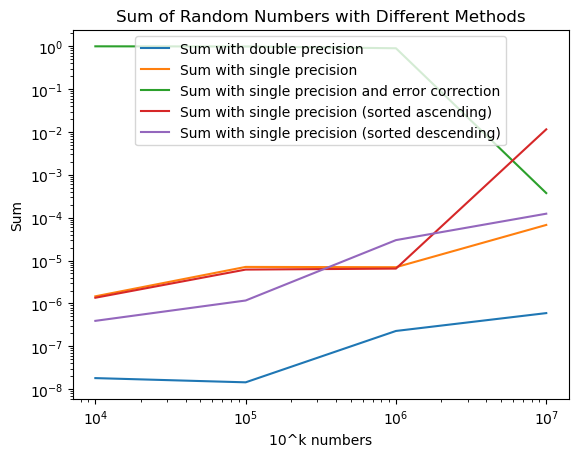

In [28]:
ks = [10**k for k in range(4, 8)]

plt.loglog(ks, results_a, label='Sum with double precision')
plt.loglog(ks, results_b, label='Sum with single precision')
plt.loglog(ks, results_c, label='Sum with single precision and error correction')
plt.loglog(ks, results_d, label='Sum with single precision (sorted ascending)')
plt.loglog(ks, results_e, label='Sum with single precision (sorted descending)')

plt.xlabel('10^k numbers')
plt.ylabel('Sum')
plt.title('Sum of Random Numbers with Different Methods')
plt.legend()
plt.show()